# SO THIS IS A DATA ANALYTICS WORKFLOW THAT I'M CREATING IN ORDER TO AUTOMATE THE PROCESS OF DATA CLEAN,IMPORTING, MODEL SELECTION, HYPERPARAMENTER TUNING AND PIPELINING

IMPORTING ALL THE NECESSARY LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
#import missingno
from sklearn.preprocessing import Imputer
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer


IMPORTING THE SCIKIT LEARN BECAUSE ITS HEAVENLY

# LETS DEFINE A FUCNTION TO TAKE IN DATA , JUST GIVE INPUT OF THE STRING NAME OF THE FILE IN THE FORMAT data/name_of_the_file.csv


In [3]:
def datainp():
    X=''
    X=input('Enter name of the file to take as input')
    df=pd.read_csv(X)
    return df

In [4]:
df_train=datainp()

Enter name of the file to take as inputdata/train.csv


In [5]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Lets see the number of missing values

In [6]:
def missingcheck(df):
    print(df.info())
    print(missingno.matrix(df, figsize = (30,10)))

In [7]:
missingcheck(df_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


NameError: name 'missingno' is not defined

# TAKING THE DATA IN AND CLEANING IT

# CLEARLY WE CAN SEE THAT THE COLUMNS OF AGE AND CABIN ARE INCOMPLETE . LETS SEE THIS DATA

In [8]:
df_train['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [9]:
df_train['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

# We will fill the AGE column with mean age coz why not? We will use imputing for this purpose , with strategy ='mean' and missing_values='Nan'

In [10]:
def impute(feature):
    imp=SimpleImputer(missing_values=np.nan,strategy='mean')
    feature=feature.to_frame()
    feature=imp.fit_transform(feature)
    feature=pd.DataFrame(data=feature)
    return feature

In [11]:
feature=impute(df_train['Age'])

In [12]:
df_train['Age']=feature

# NOW CREATING A FUCNTION TO REPLACE THE OLD COLUMN WITH THE NEW IMPUTED COLUMN 

APPLYING GET_DUMMIES AS WE KNOW THAT THE SCIKIT LEARN API DOESNT WORK GREAT WITH CATEGORICAL DATA

In [14]:
def replacecolumn(df,add):
    remove=input('give the name of the column you want to replace')
    df[remove]=add
    return df
    
    

In [16]:
df_train=replacecolumn(df_train,feature)

give the name of the column you want to replaceAge


In [17]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


# Now getting dummies

In [21]:
def dummies(df):
    feature=''
    feature=input('Which column you want dummies on?')
    dummies=pd.get_dummies(df[feature])
    df=df.drop(feature,axis='columns')
    df=pd.concat([df,dummies],axis=1)
    return df
    
    

In [22]:
df_train=dummies(df_train)

Which column you want dummies on?Sex


In [24]:
df_train=dummies(df_train)

Which column you want dummies on?Pclass


In [25]:
df_train=dummies(df_train)

Which column you want dummies on?Embarked


In [26]:
df_train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,female,male,1,2,3,C,Q,S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,0,0,1


In [167]:
import seaborn as sns

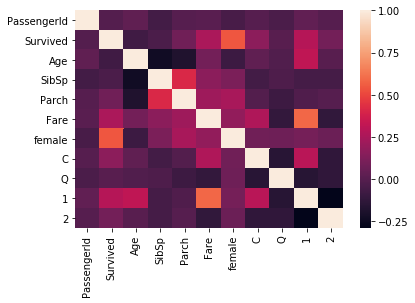

In [168]:
sns.heatmap(df_train.corr())

In [173]:
df_train['Group']=df_Train['Age']

In [174]:
for i in range(len(df_train)):
    if df_train['Age'][i]>50:
        df_train['Group'][i]=5
    elif df_train['Age'][i]>40 and df_train['Age'][i]<50:
        df_train['Group'][i]=4
    elif df_train['Age'][i]>20 and df_train['Age'][i]<40:
        df_train['Group'][i]=3
    elif df_train['Age'][i]>13 and df_train['Age'][i]<20:
        df_train['Group'][i]=2
    else:
        df_train['Group'][i]=1

In [175]:
df_train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,female,C,Q,1,2,Group
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,0,0,0,3.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,1,0,1,0,3.0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,0,3.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,1,0,3.0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,0,0,0,3.0


In [49]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


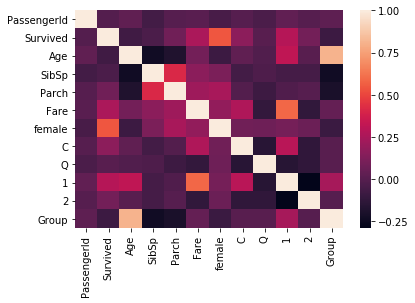

In [178]:
sns.heatmap(df_train.corr())

In [180]:
df_train=df_train.drop(columns='Group')

In [181]:
df_train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,female,C,Q,1,2
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,0,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,1,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,1,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,0,0,0


In [182]:
X_train=df_train.drop(columns='Survived')

In [183]:
y_train=df_train['Survived']

In [184]:
X_train.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,female,C,Q,1,2
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,0,0,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,1,0,1,0
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,1,0
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,0,0,0


In [187]:
y_train=y_train.to_frame()

In [188]:
from sklearn.neighbors import KNeighborsClassifier

In [189]:
knn=KNeighborsClassifier(n_neighbors=10)

In [196]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [192]:
X_train=X_train.drop(columns='Name')

In [195]:
X_train=X_train.drop(columns=['Ticket','Cabin'])

In [201]:
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=0.2,random_state=10)

In [202]:
knn.predict(X_test)

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [203]:
knn.score(X_train,y_train)

0.6853932584269663

In [206]:
knn.score(X_test,y_test)

0.8044692737430168

In [207]:
from sklearn.model_selection import cross_val_score

In [210]:
cv_results=cross_val_score(knn,X_test,y_test,cv=5)

In [211]:
np.mean(cv_results)

0.7093436293436295